<a href="https://colab.research.google.com/github/NaziBaramaki/ImageDenoising/blob/main/Checking_Time_Effect_On_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage.filters import gaussian
from skimage.io import imread, imshow, show
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving office_noisy.png to office_noisy.png


In [ ]:
# Load the initial "noisy office" image
image = imread('office_noisy.png')

Output image with diffusion coefficient d = 1:


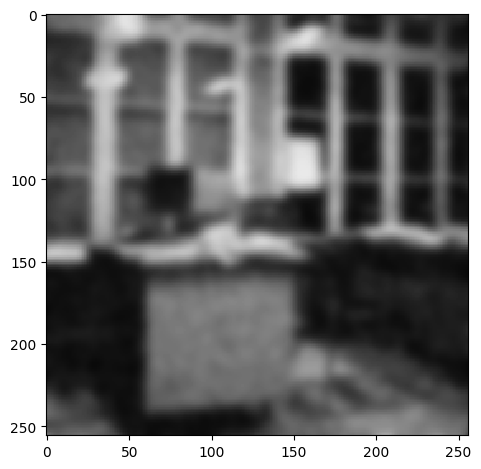

Output image with diffusion coefficient d = 5:


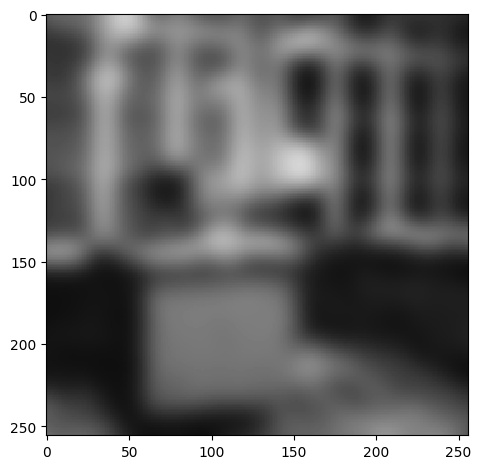

Output image with diffusion coefficient d = 10:


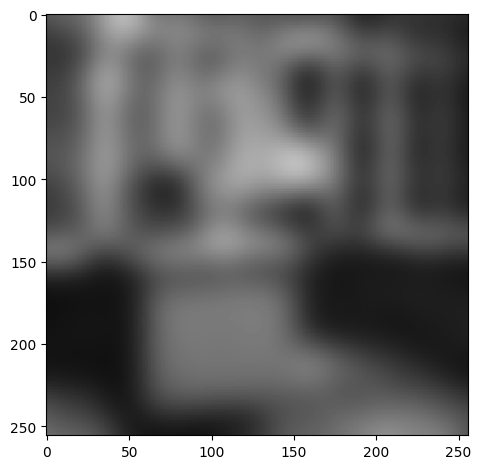

In [ ]:
# Solve the diffusion PDE for different values of the diffusion coefficient
for d in [1, 5, 10]:
    output_image = gaussian(image, sigma=np.sqrt(10 * d))
    print(f"Output image with diffusion coefficient d = {d}:")
    imshow(output_image)
    show()

In [ ]:
def gradient(u):
    dx = np.concatenate((u[:, 1:] - u[:, :-1], u[:, -1:] - u[:, -1]), axis=1)
    dy = np.concatenate((u[1:, :] - u[:-1, :], u[-1:, :] - u[-1, :]), axis=0)
    return dx, dy

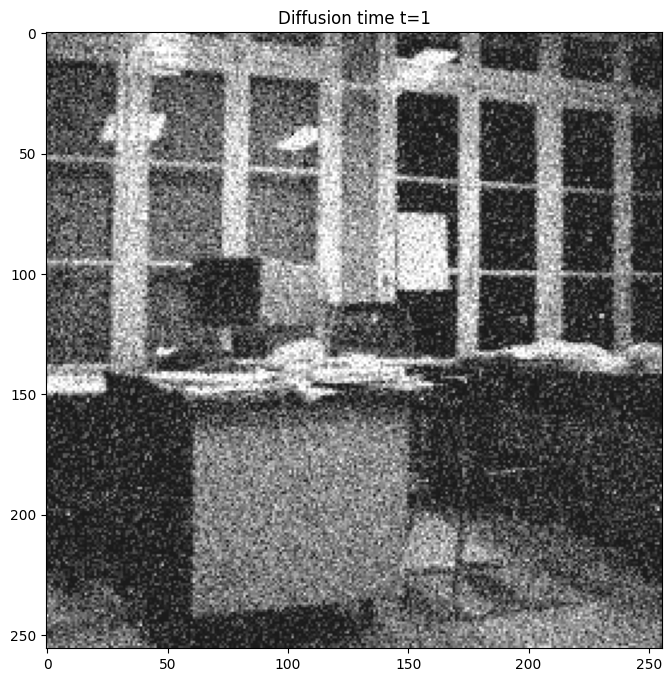

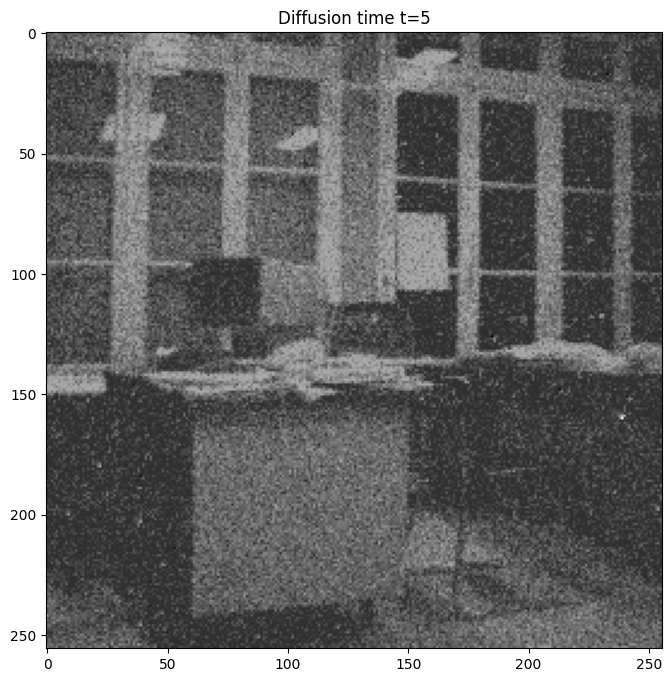

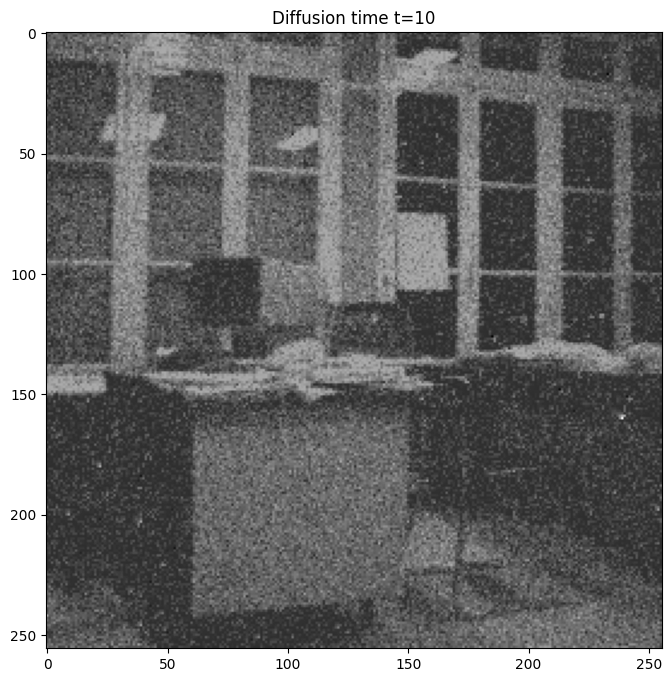

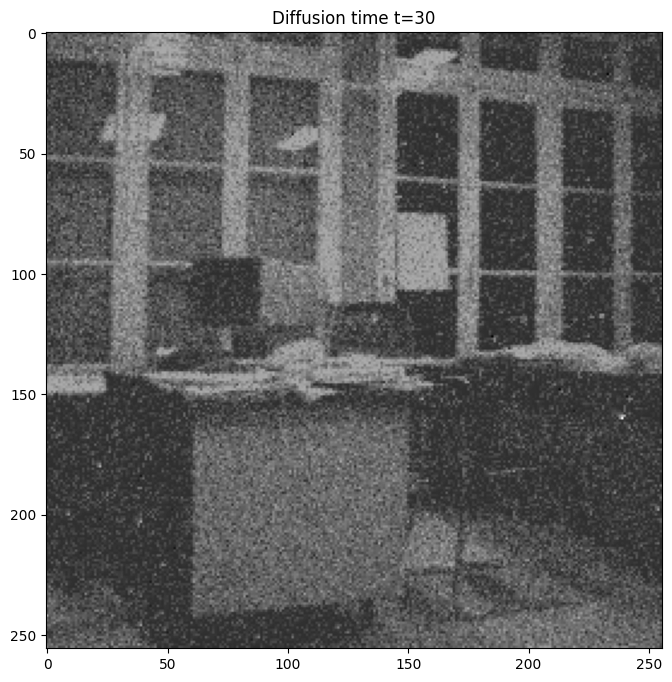

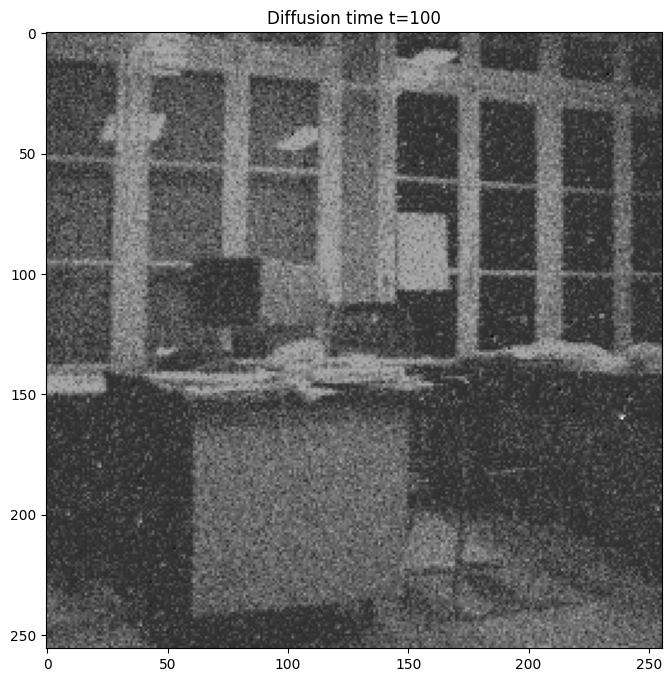

In [ ]:
u = np.array(image, dtype=np.float32)

# Define the parameters
M, N = u.shape
lambda_val = 0.5
t_values = [1, 5, 10, 30, 100]

# Solve the diffusion PDE using the finite difference method
for t in t_values:
    for _ in range(t):

        # Compute the gradient of the image
        dx, dy = gradient(u)
        dx = dx[:, :256]

        # Compute the diffusion tensor
        D = 1 / (1 + (dx**2 + dy**2) / lambda_val**2)


        # Update the image using the finite difference method
        u_new = u.copy()
        u_new[1:-1, 1:-1] = u[1:-1, 1:-1] + (
            D[1:-1, 1:-1] * (u[0:-2, 1:-1] - 2 * u[1:-1, 1:-1] + u[2:, 1:-1]) +
            D[1:-1, 1:-1] * (u[1:-1, 0:-2] - 2 * u[1:-1, 1:-1] + u[1:-1, 2:])
        )

        # Apply Dirichlet boundary conditions
        u_new[0, :] = u[0, :]
        u_new[-1, :] = u[-1, :]
        u_new[:, 0] = u[:, 0]
        u_new[:, -1] = u[:, -1]

        u = u_new

    # Display the output image
    plt.figure(figsize=(8, 8))
    plt.imshow(u, cmap='gray')
    plt.title(f"Diffusion time t={t}")
    plt.show()